# Spark Streaming

Spark Streaming enables scalable, high-throughput, fault-tolerant stream processing of live data streams.

Data can be ingested from many sources like Kafka, Flume, Kinesis, or TCP sockets, and can be processed using complex algorithms expressed with high-level functions like map, reduce, join and window.

NB. Spark structured streaming is the newer version and it is bettwe to be used instead of spark streaming. Structured Streaming is a scalable and fault-tolerant stream processing engine built on the Spark SQL engine. You can express your streaming computation the same way you would express a batch computation on static data. The Spark SQL engine will take care of running it incrementally and continuously and updating the final result as streaming data continues to arrive. 


# Twitter Project

Creating a simple application that plots out the popularity of tags associated with incoming tweets streamed live from Twitter.

Pre-requisits: 1-Create a Twitter Developer Account to get our access code; 2- Install required python libraries (tweapy, matplotlib, and seaborn).

## Twitter set up:

1- Go to apps.twitter.com, log in, and create a new app

2- Go to keys and tokens. Copy the consumer keys ('API key' and 'API secret key') somewhere safe.

3- Click on Generate 'Access Token & Secret'. Copy the 'Access token' and ' Access token secret' somewhere safe!

## Required python libraries:

### A library to connect python with Twitter: 

pip3 install tweepy   

### Libraries for visualization:

pip3 install matplotlib
pip3 install seaborn
pip3 install pandas

# Project Solution Pipeline:

The idea is to count of the actual hashtags in the tweets we recieved. we are filtering the tweets by keyword = 'guitar'. Once a specified number of tweets (2,000+, approx. 10 minutes) have been obtained, we will analyze each tweet and will then rank the top 10 most popular hash tag topics using the hash tag marker.

## Step 1: Fetching tweets using Python

We should write a simple python code (build a simple client) that will get the tweets from Twitter API using Python and passes them to the Spark Streaming instance.

Please check TweeterRead.py file. This file was provided by [3]. This code filters the Twitter streams by 'covid-19' keyword.

NB. You should fill in the credential according the ones you saved above.

## Step 2: Setting Up Our Apache Spark Streaming

First, we have to create an instance of Spark Context sc, then we created the Streaming Context ssc from sc with a batch interval 10 seconds that will do the transformation on all streams received every 10 seconds. 

## Step 3: Build our application

We want to calculate how many times the hashtag has been mentioned. 

## Step 4: Convert into Pandas Dataframes to visualize the result

Visualize the result table as it gets refreshed every 10 second

**Note:** run each cell one by one. Do not Run All the cells.


In [1]:
# May cause deprecation warnings, safe to ignore, they aren't errors
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [2]:
# Can only run this once. restart your kernel for any errors.
sc = SparkContext()

In [3]:
ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)

In [4]:
socket_stream = ssc.socketTextStream("127.0.0.1", 5555)

In [5]:
lines = socket_stream.window( 20 )

In [6]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [7]:
# Use Parenthesis for multiple lines or use \.
( lines.flatMap( lambda text: text.split( " " ) ) #Splits to a list
  .filter( lambda word: word.lower().startswith("#") ) # Checks for hashtag calls
  .map( lambda word: ( word.lower(), 1 ) ) # Lower cases the word
  .reduceByKey( lambda a, b: a + b ) # Reduces
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Stores in a Tweet Object
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) # Sorts Them in a DF
  .limit(10).registerTempTable("tweets") ) ) # Registers to a table.

 # <center>Now Run TweetRead.py</center>
 
 <center>python3 TweetRead.py</center>

In [8]:
ssc.start()  

In [9]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
# Only works for Jupyter Notebooks!
%matplotlib inline 

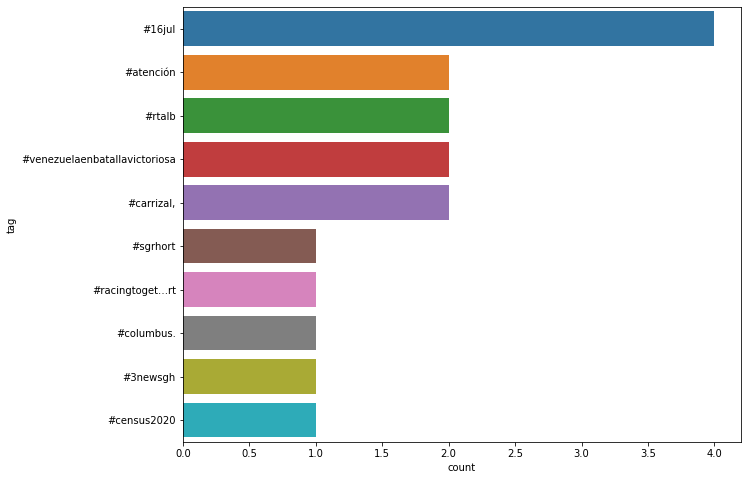

In [10]:
count = 0
while count < 10:
    
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1

In [11]:
ssc.stop()

In [12]:
type(top_10_df)

pandas.core.frame.DataFrame